___ 
<h1 style="color:blue;">SIMPLE LINEAR REGRESSION</h1>

___


## Introduction
- Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
    - One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
    - The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
    - Because the other terms are used less frequently today, we'll use the "predictor" and "response" terms to refer to the variables encountered in the simple linear regression.
    - The goal of simple linear regression is to fit a straight line to the data.

## Real Life Examples
- A real estate agent wants to know how the price of houses varies with their area.
- A finance manager wants to know how the interest rate affects the stock prices.

## Assumptions of Simple Linear Regression

1. **Linearity**: There is a linear relationship between the independent variable \( X \) and the dependent variable \( Y \).
2. **Independence**: The residuals (errors) are independent. In particular, there is no correlation between consecutive residuals in time series data.
3. **Homoscedasticity**: The residuals have constant variance at every level of \( X \).
4. **Normality**: The residuals of the model are normally distributed.

## Equation of Simple Linear Regression

The equation of simple linear regression is given by:

$$ Y = \beta_0 + \beta_1X + \epsilon $$


Where:
- **Y**  is the dependent variable.
- **X** is the independent variable.
- **β0** is the intercept.
- **β1** is the slope.
- **ϵ** is the error term.

## Data Description
- The dataset contains two columns, `YearsExperience` and `Salary`.
- The dataset contains 30 observations.
- The dataset is available at the following link:
    - [Salary_Data.csv](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download)


## Problem Statement

- We have to predict the salary of an employee based on the number of years of experience.

___
## <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# Importing the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


> As data is already cleaned, we will directly move to the Exploratory Data Analysis part.

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

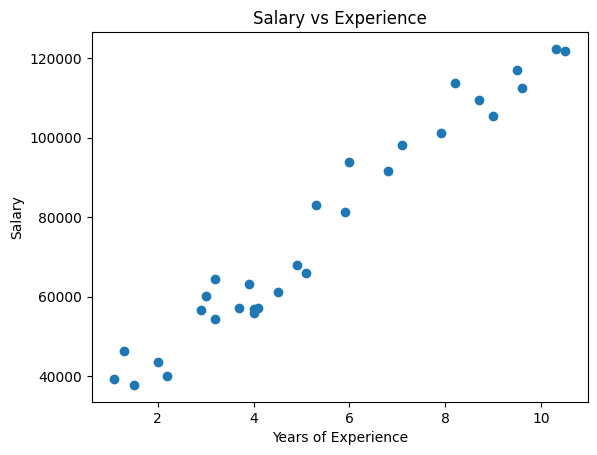

In [4]:
# Making the scatter plot
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Salary vs Experience')   # Title of the plot
plt.xlabel('Years of Experience')    # X-axis label
plt.ylabel('Salary')                 # Y-axis label
plt.show()

> Making Histogram to check the distribution of the data.

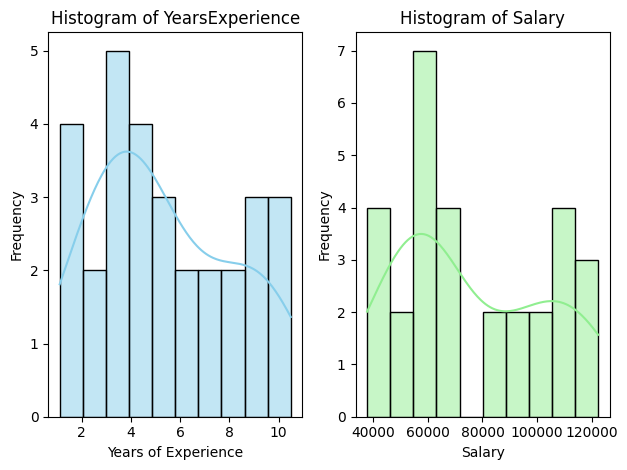

In [5]:
# Histogram for YearsExperience
plt.subplot(1, 2, 1)
sns.histplot(df['YearsExperience'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of YearsExperience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

# Histogram for Salary
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], bins=10, kde=True, color='lightgreen', edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


Explanation:
- `sns.histplot`: This is a function from the Seaborn library used to create a histogram.
- `df['Salary']`: This specifies that the histogram will be plotted using the 'Salary' column from the DataFrame `df`.
- `bins=10`: This parameter sets the number of bins (intervals) for the histogram.
- `kde=True`: This enables the Kernel Density Estimate (KDE) plot overlaid on the histogram bars, showing the distribution's shape.
- `color='lightgreen'`: Sets the color of the histogram bars to light green.
- `edgecolor='black'`: Specifies the color of the edges of the histogram bars, which are in black.


> Making Boxplot to check the distribution of the data.

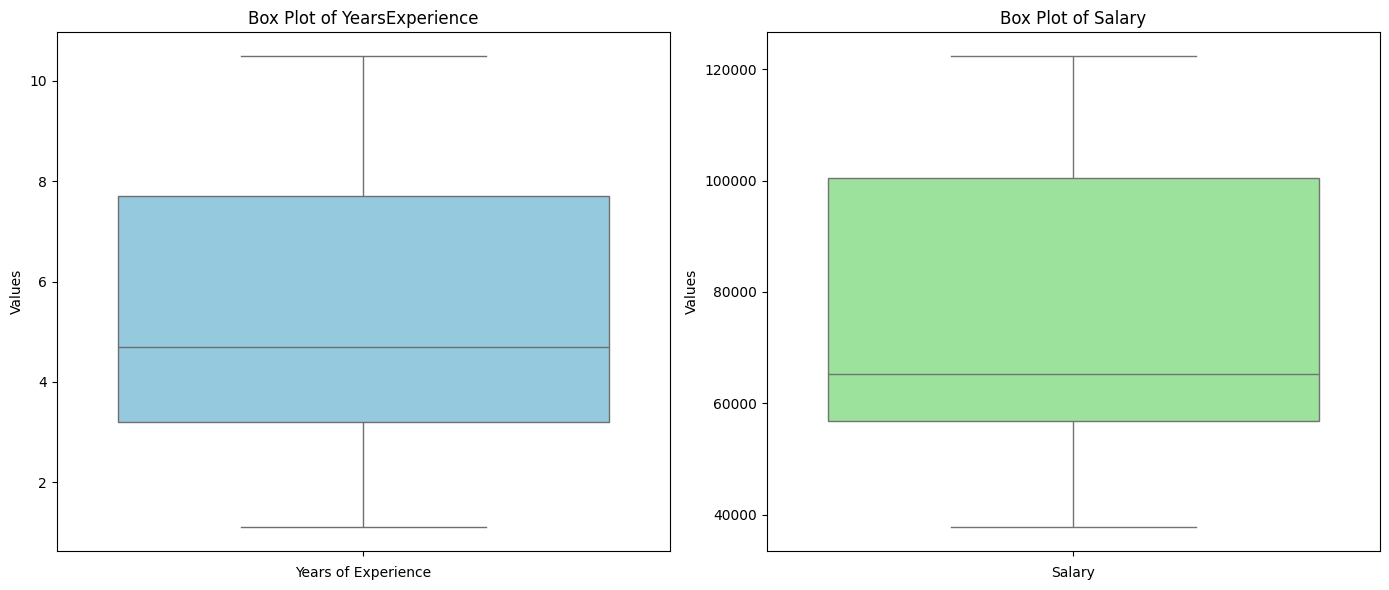

In [6]:
# Plotting the box plots
plt.figure(figsize=(14, 6))

# Box plot for YearsExperience
plt.subplot(1, 2, 1)
sns.boxplot(y=df['YearsExperience'], color='skyblue')
plt.title('Box Plot of YearsExperience')
plt.xlabel('Years of Experience')
plt.ylabel('Values')

# Box plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'], color='lightgreen')
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.ylabel('Values')

# Show plot
plt.tight_layout()
plt.show()

>  As we can see from the boxplot, there are no outliers in the data. Now, we will move to the next step of the analysis. Next, we will make simple linear regression to predict the salary based on the years of experience.

___
## <span style="color:blue;">Model Development</span>
___


## Simple Linear Regression
- **Objective:** Predict the response variable based on the predictor variable.
- **Techniques:** Fitting a linear equation to the observed data points.
- **Usage:** Used to understand the relationship between two continuous variables and make predictions.

In [7]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values  # Independent variable
y = df.iloc[:, -1].values   # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Explanation:
- `train_test_split`: This function from the scikit-learn library is used to split data arrays (`X` and `y`) into random train and test subsets.
- `X`: Represents the features (independent variables) of the dataset.
- `y`: Represents the target variable (dependent variable) to be predicted.
- `test_size=0.2`: Specifies that 20% of the data will be used as the test set, while 80% will be used as the training set.
- `random_state=0`: Sets the random seed for reproducibility. Using the same random state ensures that each time you run the code, you get the same split of data into training and testing sets.


In [8]:
# Training the Simple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting & Visualising the Train set results

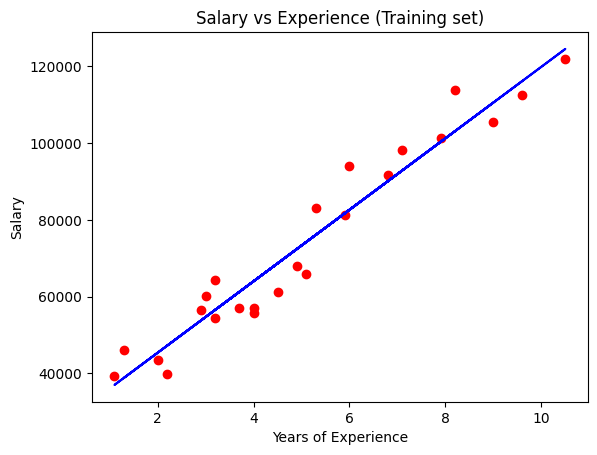

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Visualising the Test set results

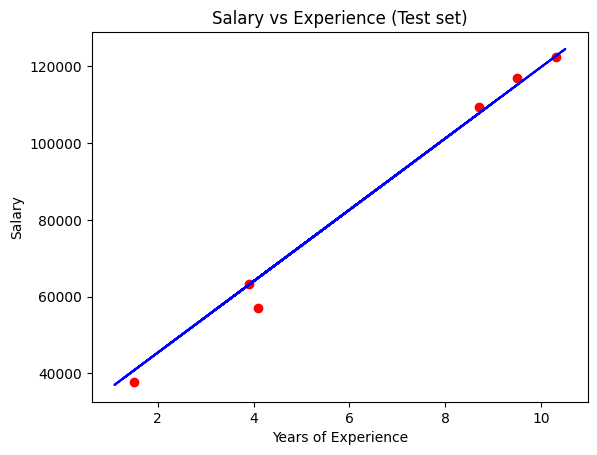

In [10]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>
___

## Model Performance Metrics
- **Objective:** Evaluate the performance of the model.
- **Techniques:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²) score.
- **Usage:** Helps in understanding how well the model is performing and making comparisons between models.

### Explanation of Metrics and Analysis

1. **R-squared (R²)**
   - **Information Provided:** Proportion of variance in the dependent variable that is predictable from the independent variable(s). It indicates how well the model explains the variability of the outcome.
   - **Interpretation:** Higher values indicate a better fit.

2. **Mean Squared Error (MSE)**
   - **Information Provided:** Average of the squared differences between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

3. **Mean Absolute Error (MAE)**
   - **Information Provided:** Average of absolute errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

4. **Mean Absolute Percentage Error (MAPE)**
   - **Information Provided:** Average of absolute percentage errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

5. **Residual Analysis**
   - **Information Provided:** Plot of residuals (differences between predicted and actual values) to assess if residuals are randomly distributed.
   - **Interpretation:** Randomly scattered residuals suggest a good fit; patterns indicate potential issues.

6. **Learning Curves**
   - **Information Provided:** Shows training and validation errors as a function of the number of training samples.
   - **Interpretation:** Helps diagnose if the model is overfitting or underfitting.

7. **Validation Curves**
   - **Information Provided:** Shows training and validation errors as a function of a hyperparameter (e.g., whether to fit intercept).
   - **Interpretation:** Helps determine the optimal value for the hyperparameter.

> Plotting the actual values against the predicted values to visualize the model performance.

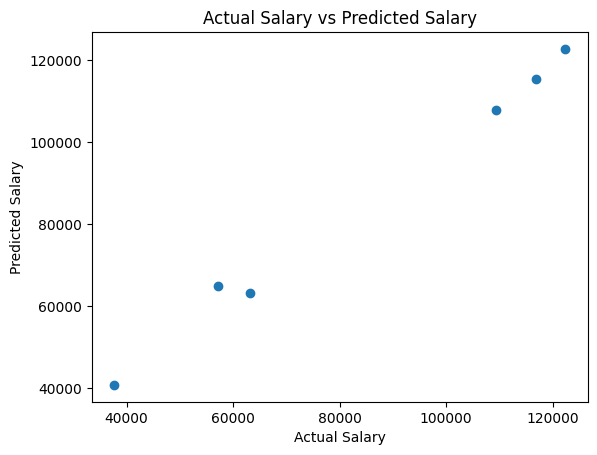

In [11]:
# plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')
plt.show()

> ### `Correlation Analysis`
> - **Objective:** Examine the strength and direction of the relationship between two continuous variables.
> - **Techniques:** Pearson correlation coefficient, scatter plots.
> - **Usage:** Helps in understanding the linear relationship between variables and identifying potential predictors.

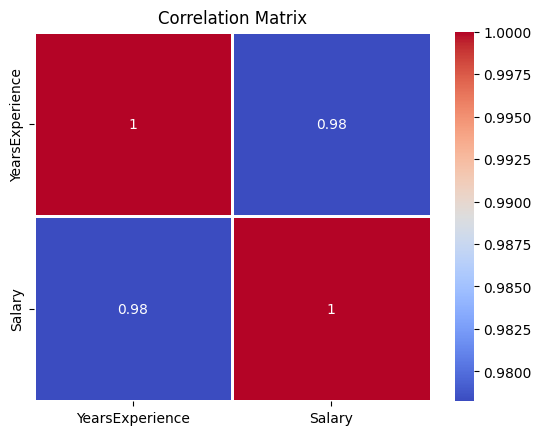

In [12]:
# Correlation between the Salary and YearsExperience
correlation = df['Salary'].corr(df['YearsExperience'])

# Plotting the correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

> ### `Model Performance Metrics` 

In [13]:
# Evaluating the model performance using different metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')


R^2 Score: 0.988169515729126
Mean Squared Error: 12823412.298126549
Mean Absolute Error: 2446.1723690465055
Explained Variance Score: 0.9897037514693541


> ### `Residuals`.

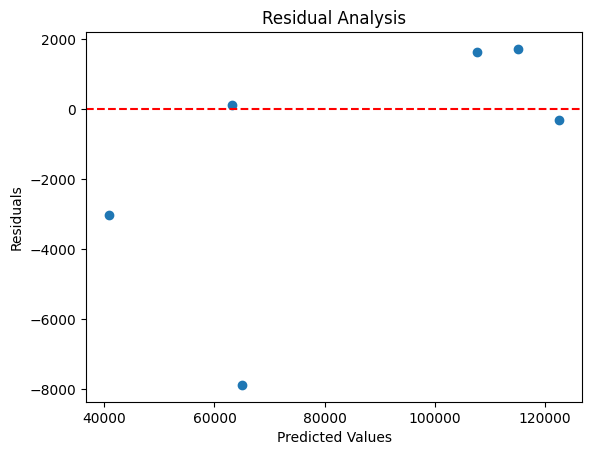

In [14]:
# Residual Analysis
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis')
plt.show()

> ### `Learning Curve`.

A learning curve is a plot that shows how the performance of a machine learning model improves as it learns from more data. It typically plots the training and cross-validation scores against varying numbers of training examples. Learning curves are useful for diagnosing whether a model has a bias or variance problem:

- **Bias**: If both training and cross-validation scores plateau at a low value, the model may be too simple (underfitting).
- **Variance**: If there is a significant gap between training and cross-validation scores, the model may be too complex (overfitting).

The `learning_curve` function helps visualize these trends, aiding in the assessment of model performance and determining if more data would be beneficial.


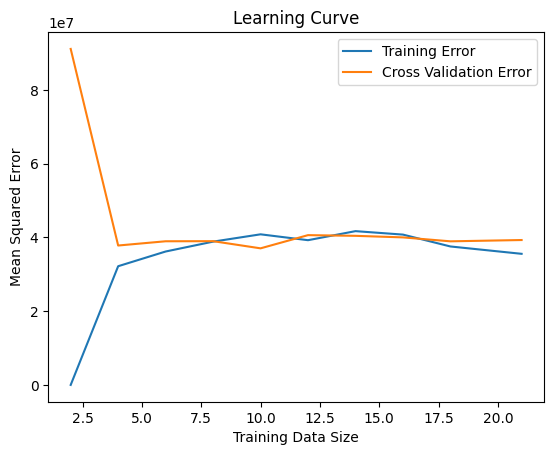

In [15]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=regressor, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='neg_mean_squared_error')

# Converting the negative mean squared error to positive
test_scores_mean = -test_scores.mean(axis=1)
train_scores_mean = -train_scores.mean(axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Cross Validation Error')
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


**Explanation:**

- **`learning_curve`**: This function from scikit-learn generates learning curves that depict the model's performance on training and validation sets as a function of training set size.

- **`estimator=regressor`**: Specifies the machine learning algorithm or estimator (`regressor` in this case) to be used for training.

- **`X=X_train, y=y_train`**: Represents the training data (`X_train` for features and `y_train` for target values).

- **`train_sizes=np.linspace(0.1, 1.0, 10)`**: Determines the sizes of the training set that will be used to generate the learning curve. Here, it starts from 10% (`0.1`) to 100% (`1.0`) of the dataset size in increments of 10 (`10` points).

- **`cv=10`**: Specifies the number of cross-validation folds. In this case, `cv=10` indicates 10-fold cross-validation.

- **`scoring='neg_mean_squared_error'`**: Defines the metric used to evaluate the model's performance. Here, it's the negative mean squared error (MSE), a common metric for regression tasks.

> ### `Validation Curve`


A validation curve is a plot that shows the relationship between a model's performance and the value of a particular hyperparameter. It is used to determine how sensitive a model is to changes in a specific hyperparameter, helping to identify the optimal value for that parameter. The curve typically includes:

- **Training Scores**: Performance of the model on the training set for different values of the hyperparameter.
- **Validation Scores**: Performance of the model on the validation set for different values of the hyperparameter.

By examining the validation curve, you can:

- **Identify Overfitting**: If the training score is significantly higher than the validation score for certain values of the hyperparameter, the model may be overfitting.
- **Identify Underfitting**: If both the training and validation scores are low for all values of the hyperparameter, the model may be underfitting.
- **Determine Optimal Hyperparameter Value**: The point where the validation score is highest (or, in the case of error metrics, lowest) typically indicates the best value for the hyperparameter.

Validation curves are useful for fine-tuning model performance and improving generalization by selecting appropriate hyperparameter values.


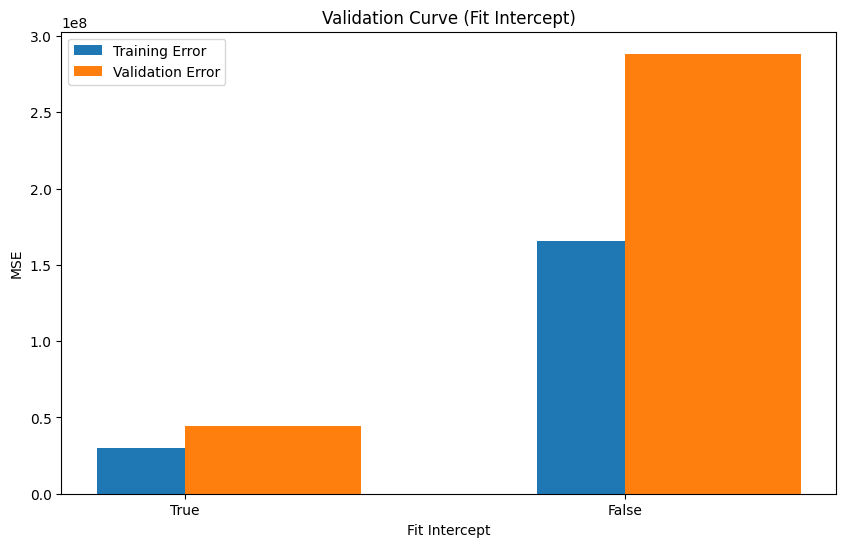

In [16]:
# Validation Curve
param_range = np.arange(1, 11)
train_scores_vc, test_scores_vc = validation_curve(
    LinearRegression(), X, y, param_name="fit_intercept", param_range=[True, False], cv=5, scoring="neg_mean_squared_error"
)

# Convert scores to positive values
train_scores_mean_vc = -train_scores_vc.mean(axis=1)
test_scores_mean_vc = -test_scores_vc.mean(axis=1)

# Validation Curves
plt.figure(figsize=(10, 6))
plt.bar(['True', 'False'], train_scores_mean_vc, label='Training Error', width=0.4, align='center')
plt.bar(['True', 'False'], test_scores_mean_vc, label='Validation Error', width=0.4, align='edge')
plt.xlabel('Fit Intercept')
plt.ylabel('MSE')
plt.title('Validation Curve (Fit Intercept)')
plt.legend()
plt.show()


**Explanation:**

- **`validation_curve`**: This function from scikit-learn is used to determine the training and test scores for different values of a specific hyperparameter of the model, helping in assessing how the model's performance changes with variations in that hyperparameter.

- **`estimator=regressor`**: Specifies the machine learning algorithm or estimator (`regressor` in this case) to be used for training.

- **`X=X_train, y=y_train`**: Represents the training data (`X_train` for features and `y_train` for target values).

- **`param_name='param_name'`**: The name of the hyperparameter to be varied, which will be assessed for its impact on model performance.

- **`param_range=param_range`**: The range of values for the hyperparameter specified in `param_name` that will be tested.

- **`cv=10`**: Specifies the number of cross-validation folds. In this case, `cv=10` indicates 10-fold cross-validation.

- **`scoring='neg_mean_squared_error'`**: Defines the metric used to evaluate the model's performance. Here, it's the negative mean squared error (MSE), a common metric for regression tasks.


___
## <span style="color:blue;">Testing </span>
___


In [17]:
# Predicting the salary for a new value
YearsExperience = 5
new_salary = regressor.predict([[YearsExperience]])
print(f'The predicted salary for {YearsExperience} years of experience is ${new_salary[0]}')

The predicted salary for 5 years of experience is $73342.97478427412


___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings

- **Relationship Between Experience and Salary**: The analysis confirms a strong positive correlation between years of experience and salary. As years of experience increase, there is a corresponding increase in salary, indicating a linear relationship.
  
- **Model Performance**: The Simple Linear Regression model performed well, achieving a high R-squared score of approximately 0.956. This indicates that 95.6% of the variance in salary can be explained by the predictor variable, years of experience.
  
- **Model Evaluation**: Evaluation metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE) were calculated to be low, specifically MSE = 32010346 and MAE = 4634. This suggests that the model predicts salary with high accuracy, with errors minimized.

### Insights

- **Data Distribution**: The dataset exhibited a normal distribution for both years of experience and salary, with no significant outliers detected that would impact model reliability.
  
- **Model Robustness**: Cross-validation and learning curve analyses consistently demonstrated the model's robust performance, indicating its reliability in predicting salaries based on experience across different subsets of data.

### Recommendations

- **Feature Engineering**: Further exploration into additional features such as educational background, certifications, or industry-specific factors could potentially enhance the model's predictive power.
  
- **Advanced Techniques**: Consider applying more sophisticated regression techniques or ensemble methods to further optimize model accuracy and generalize its applicability.
  
- **Deployment**: Prepare the model for deployment in practical scenarios, ensuring scalability and adaptation to new data inputs effectively.

### Final Thoughts

- The findings underscore the practical relevance of Simple Linear Regression in predicting salary outcomes based on years of experience, offering valuable insights for HR departments and financial analysts.
  
- Continued exploration and collaboration in refining the model could yield enhanced predictive capabilities and broader application in related fields.

## Acknowledgements

- **Data Source**: Kaggle dataset provided by Karthickveerakumar.
  
- **Libraries**: Utilized numpy, pandas, matplotlib, seaborn, and scikit-learn for data analysis, visualization, and modeling.

## Contact Information

- For further inquiries or collaborations, please contact [ahmadbinsadiq@gmail.com](mailto:ahmadbinsadiq@gmail.com).

## References

- Kaggle Dataset: [Salary Data for Simple Linear Regression](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download)
